In [2]:
# Load EDA
import pandas as pd
import numpy as np

In [43]:
# Load Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_pac = pd.read_csv('data/HSL_Pacientes_2.csv', sep='|')
df_desf = pd.read_csv('data/HSL_Desfechos_2.csv', sep='|')
df_labResult = pd.read_csv('data/HSL_Exames_2.csv', sep='|')

In [44]:
df_desf.head()

,id_paciente,id_atendimento,dt_atendimento,de_tipo_atendimento,id_clinica,de_clinica,dt_desfecho,de_desfecho
0,3487791F44C34B421C932DC8616A8437,33277D918111011E48FABCD6FC09012B,2020-07-08,Pronto Atendimento,6,Ortopedia,2020-07-08,Alta médica melhorado
1,3487791F44C34B421C932DC8616A8437,2DF164AD7E51B0A2F52B6DB58F904A22,2020-05-08,Externo,20,Procedimentos,2020-05-08,Alta Administrativa
2,3487791F44C34B421C932DC8616A8437,11676CFEEF6A4CDD49B0A74D3F3A85EC,2020-05-25,Externo,20,Procedimentos,2020-05-25,Alta Administrativa
3,0AD1FFA4419472256666A3445414F1F9,70A834FEFF3562FCBA3888D592DA2609,2020-03-16,Externo,20,Procedimentos,2020-03-16,Alta Administrativa
4,3487791F44C34B421C932DC8616A8437,A3F017D035922D728E06B744511A6797,2020-05-11,Pronto Atendimento,42,CL Médica Síndromes Virais,2020-05-11,Alta médica melhorado


In [18]:
df_pac.head()

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEPREDUZIDO
0,3487791F44C34B421C932DC8616A8437,M,1963,BR,SP,MMMM,CCCC
1,0AD1FFA4419472256666A3445414F1F9,M,1969,BR,SP,SAO PAULO,CCCC
2,BE35D08CF3EF6F114E9935F6D72C49FA,M,1964,BR,SP,SAO PAULO,CCCC
3,962F4020D456AAB602B356E57238EF42,F,1959,BR,SP,SAO PAULO,CCCC
4,F983089DAC62E42124227C856AE3444C,M,1947,BR,SP,MMMM,CCCC


In [16]:
df_pac.columns

Index(['ID_PACIENTE', 'IC_SEXO', 'AA_NASCIMENTO', 'CD_PAIS', 'CD_UF',
       'CD_MUNICIPIO', 'CD_CEPREDUZIDO'],
      dtype='object')

In [6]:
df_labResult.columns

Index(['ID_PACIENTE', 'ID_ATENDIMENTO', 'DT_COLETA', 'DE_ORIGEM', 'DE_EXAME',
       'DE_ANALITO', 'DE_RESULTADO', 'CD_UNIDADE', 'DE_VALOR_REFERENCIA'],
      dtype='object')

In [17]:
df_desf.columns

Index(['id_paciente', 'id_atendimento', 'dt_atendimento',
       'de_tipo_atendimento', 'id_clinica', 'de_clinica', 'dt_desfecho',
       'de_desfecho'],
      dtype='object')

In [21]:
df_idPac = pd.merge(df_pac, df_labResult, on='ID_PACIENTE')
df_idPac.columns, df_idPac.size

(Index(['ID_PACIENTE', 'IC_SEXO', 'AA_NASCIMENTO', 'CD_PAIS', 'CD_UF',
        'CD_MUNICIPIO', 'CD_CEPREDUZIDO', 'ID_ATENDIMENTO', 'DT_COLETA',
        'DE_ORIGEM', 'DE_EXAME', 'DE_ANALITO', 'DE_RESULTADO', 'CD_UNIDADE',
        'DE_VALOR_REFERENCIA'],
       dtype='object'),
 3891600)

In [7]:
# Missing Values of Column
def verificarMissing(coluna, df):
    missingC = df[coluna].isnull().sum()
    print("Valores Faltantes: ", missingC)
    return missingC

# Create a list of fields presented in column 
def listarUnicos(valor, df):
    ndf = df[~df[valor].isna()].copy()
    lista = ndf[valor].unique().tolist()
    print("Lista: ", lista)
    return lista

# Resume
def exibirResumo(campo, df):
    verificarMissing(campo, df)
    listarUnicos(campo, df)
    print('//')

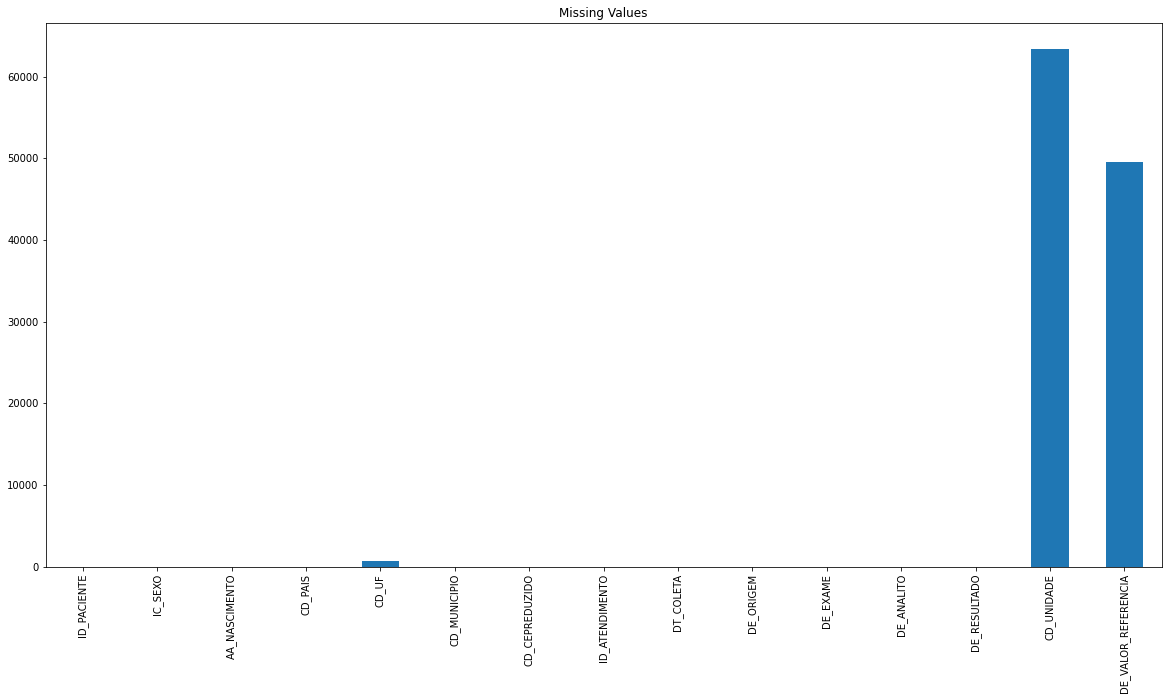

In [22]:
plt.figure(figsize=(20, 10))
df_idPac.isnull().sum().plot(kind='bar')
plt.title("Missing Values")
plt.show()

In [23]:
for idPac in df_idPac.columns:
    print(idPac)
    exibirResumo(idPac, df_idPac)

ID_PACIENTE
Valores Faltantes:  0
Lista:  ['3487791F44C34B421C932DC8616A8437', '0AD1FFA4419472256666A3445414F1F9', 'BE35D08CF3EF6F114E9935F6D72C49FA', 'F983089DAC62E42124227C856AE3444C', '11CE6296257A354E5D0B342F37F82111', '87D0DF35EA2D504FA30F81E84ACB8EF4', 'ABF9C657CAF8ABC5DA6C6B7A5D421924', '313E7D092611F0C58251064957CA6B4C', 'A084F26F690DBC23A52E67027693F2B2', 'EF76A95879354195A081BAAE73BC980D', '197E931B3EE852997D554B092E9455CB', '5B27395F7B9ED5A757C4AFA56E2A4574', '9D3FCC1CE3E893C90DF4E8CC22001116', '9B9914B73DC57C17223770EC82713AD9', '8B529A34361525D285DF1358FD960787', '3834EE34C6B4325ACAEBD1FA03921BA4', 'E284F16E8C190E4C16B338A073B7DB22', '4883803CDCB3A8390108B4D73BF9711E', 'B8A474D172DDB5BAD11F088BDA20BE96', 'CBC913F70BBBFD2FA0257D684B7BC1C9', 'AF9D3E587BD23DBDDE63A8EDFE8BFAF8', '359A0501785DCA37B0C9EB14E72CB191', '678DD025D5B3542717910EDB93C4578D', '7CBA93C8E64785A29EE93327D50AE65D', '263306DEE8C7E0A29890636AEE887DF5', 'CE5ECE92C04094D7808B34E2C7E84F8C', '78F3AD1DAA4D88591FD1

Lista:  ['M', 'F']
//
AA_NASCIMENTO
Valores Faltantes:  0
Lista:  ['1963', '1969', '1964', '1947', '1954', 'AAAA', '1950', '1935', '1966', '1967', '1952', '1989', '1973', '1955', '1974', '1995', '1984', '1994', '1957', '1993', '1962', '1972', '1958', '1981', '1971', '2019', '1987', '2003', '1970', '1983', '1986', '1992', '1985', '1988', '1959', '1977', '1976', '1933', '1999', '1980', '1978', '1945', '1998', '1979', '1990', '1996', '1991', '1946', '1951', 'YYYY', '1968', '1944', '1975', '1965', '1941', '1940', '1934', '1997', '1982', '1960', '1961', '1948', '1953', '1956', '2000', '1938', '1942', '2004', '1939', '2014', '2005', '2001', '2009', '1943', '2002', '1937', '1931', '1936']
//
CD_PAIS
Valores Faltantes:  0
Lista:  ['BR', 'XX']
//
CD_UF
Valores Faltantes:  677
Lista:  ['SP', 'BA', 'DF', 'PA', 'RJ', 'GO', 'MG', 'UU', 'SC', 'PR', 'MT', 'MA', 'MS', 'AM']
//
CD_MUNICIPIO
Valores Faltantes:  0
Lista:  ['MMMM', 'SAO PAULO', 'BRASILIA', 'GUARULHOS']
//
CD_CEPREDUZIDO
Valores Faltantes:

Lista:  ['Fosfatase Alcalina', 'Gama Gt', 'Tgp', 'Desidrogenase Lática (DHL/L)', 'Proteína C Reativa, plasma', 'Tgo', 'Fibrinogênio, Dosagem Do', 'D. Dimeros(Dimeros De Fibrina)', 'Hemograma', 'Troponina', 'Uréia', 'Calculo da Estimativa da Taxa, de Filtracao Glomular, soro', 'Creatinina', 'Potássio', 'Sódio', 'Creatinofosfoquinase Cpk-Ck', 'COVID-19-Sorologia IgM e IgG por quimiluminescência, soro', 'Hemograma, sangue total', 'Proteína C Reativa, por imunoturbidimetria, soro', 'Desidrogenase Lática  ( LDH )', 'Hemoglobina Glicada', 'Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica)', 'COVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury)', 'Ferritina, Dosagem', 'Lactato', 'Gasometria Venosa', 'Magnesio', 'Potássio, sangue total', 'Cálcio Ionizado, sangue total', 'Lactato - URG', 'Gasometria Arterial', 'Cloro, urgente, sangue total', 'Cálcio Ionizável', 'Fósforo', 'Bilirrubinas Total E Fracoes', 'Tempo E Ativid. Protrombina (Tp)', 'Tempo Tromb.Parcial Ativada', 'Glice

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:

df_creat = df_idPac.loc[df_idPac['DE_ANALITO'] == 'Creatinina']

In [26]:
df_creat.columns

Index(['ID_PACIENTE', 'IC_SEXO', 'AA_NASCIMENTO', 'CD_PAIS', 'CD_UF',
       'CD_MUNICIPIO', 'CD_CEPREDUZIDO', 'ID_ATENDIMENTO', 'DT_COLETA',
       'DE_ORIGEM', 'DE_EXAME', 'DE_ANALITO', 'DE_RESULTADO', 'CD_UNIDADE',
       'DE_VALOR_REFERENCIA'],
      dtype='object')

In [50]:
df_creat.head()

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEPREDUZIDO,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA
36,3487791F44C34B421C932DC8616A8437,M,1963,BR,SP,MMMM,CCCC,58DB2576E7220A442BC49D2F02832708,2020-05-04,Pronto Socorro,"Calculo da Estimativa da Taxa, de Filtracao Gl...",Creatinina,"0,91",mg/dL,"0,70 a 1,30"
41,3487791F44C34B421C932DC8616A8437,M,1963,BR,SP,MMMM,CCCC,58DB2576E7220A442BC49D2F02832708,2020-05-04,Pronto Socorro,Creatinina,Creatinina,"0,91",mg/dL,"0,70 a 1,30"
176,F983089DAC62E42124227C856AE3444C,M,1947,BR,SP,MMMM,CCCC,51DE78D45E2762409EB7615650CDED65,2020-04-09,Unidades de Internação,"Calculo da Estimativa da Taxa, de Filtracao Gl...",Creatinina,"0,85",mg/dL,"0,70 a 1,30"
181,F983089DAC62E42124227C856AE3444C,M,1947,BR,SP,MMMM,CCCC,51DE78D45E2762409EB7615650CDED65,2020-04-09,Unidades de Internação,Creatinina,Creatinina,"0,85",mg/dL,"0,70 a 1,30"
191,F983089DAC62E42124227C856AE3444C,M,1947,BR,SP,MMMM,CCCC,51DE78D45E2762409EB7615650CDED65,2020-04-04,Unidades de Internação,"Calculo da Estimativa da Taxa, de Filtracao Gl...",Creatinina,"0,91",mg/dL,"0,70 a 1,30"


In [53]:
df_CM = df_creat[(df_creat.IC_SEXO == 'M')]
df_CF = df_creat.loc[df_creat['IC_SEXO'] == 'F']

In [40]:
# df_CM['DE_RESULTADO'].agg({'DE_RESULTADO': ['min', 'max', 'median', 'skew']})
df_CM['DE_RESULTADO'].describe() 


count     5503
unique     404
top       0,85
freq        97
Name: DE_RESULTADO, dtype: object

In [41]:
df_CF['DE_RESULTADO'].describe() 


count     3620
unique     286
top       0,70
freq        96
Name: DE_RESULTADO, dtype: object